In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#loading dataset
df=fetch_california_housing()

In [4]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
dataset=pd.DataFrame(df.data)

In [9]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
dataset.columns=df.feature_names

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
dataset['MedHouseVal']=df.target

In [13]:
dataset.shape

(20640, 9)

In [14]:
# Let's summarize the data to see the distribution of data
print(dataset.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

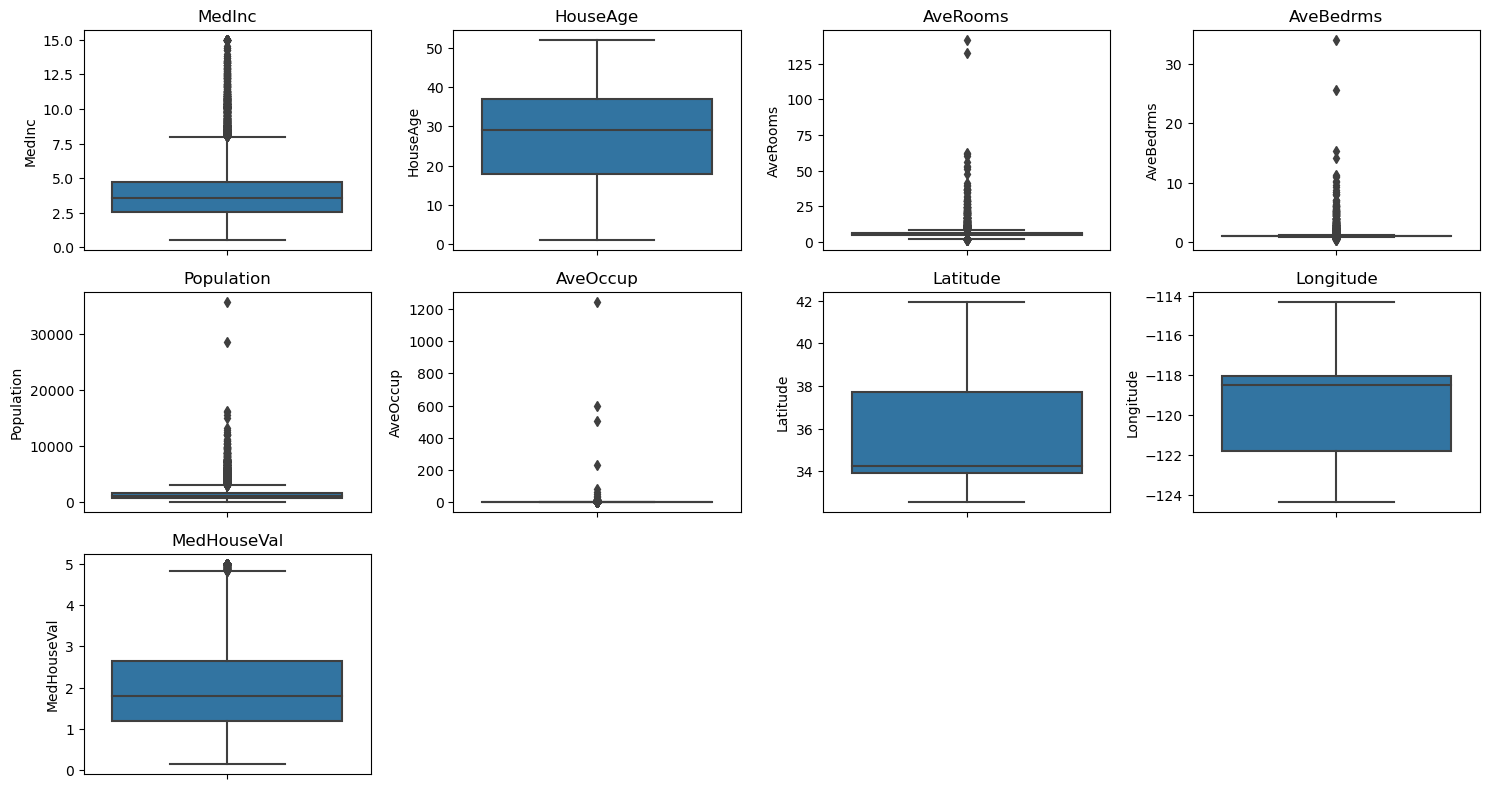

In [15]:
# Set up a figure for the boxplots
plt.figure(figsize=(15, 8))

# Loop through each column and create a boxplot
for i, column in enumerate(dataset.columns):
    plt.subplot(3, 4, i + 1)  # Adjust the subplot grid size accordingly (3 rows, 4 columns in 
    sns.boxplot(y=column, data=dataset)                                            #this case)
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [16]:
# Loop through each column in the DataFrame
for column in dataset:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Determine outliers (values outside of 1.5 * IQR)
    outliers = dataset[column][(dataset[column] < (q1 - 1.5 * iqr)) | (dataset[column] > (q3 + 1.5 * iqr))]
    
    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(dataset[column])) * 100
    
    # Print the percentage of outliers for the column
    print(f"Column {column} outliers = {outlier_percentage:.2f}%")


Column MedInc outliers = 3.30%
Column HouseAge outliers = 0.00%
Column AveRooms outliers = 2.48%
Column AveBedrms outliers = 6.90%
Column Population outliers = 5.79%
Column AveOccup outliers = 3.44%
Column Latitude outliers = 0.00%
Column Longitude outliers = 0.00%
Column MedHouseVal outliers = 5.19%


In [17]:
 dataset = dataset[~((dataset[column] < (q1 - 1.5 * iqr)) | (dataset[column] > (q3 + 1.5 * iqr)))]

In [62]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
dataset.shape

(19569, 9)

In [30]:
## Independent features and dependent features
X=dataset.drop("MedHouseVal",axis=1)
y=dataset["MedHouseVal"]

In [31]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 19569, dtype: float64

In [32]:
## train test split 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [33]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7205,1.8875,34.0,4.247126,1.060345,1735.0,4.985632,34.02,-118.19
17086,3.0472,26.0,3.575453,1.116700,1966.0,3.955734,37.47,-122.21
14869,2.4148,27.0,3.914209,1.032172,1935.0,2.593834,32.63,-117.09
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42
17328,5.5194,18.0,7.543175,1.064067,988.0,2.752089,34.62,-120.09
...,...,...,...,...,...,...,...,...
11934,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
12621,3.1607,20.0,5.223169,1.127768,2595.0,2.210392,38.51,-121.53
5651,2.5759,43.0,3.814815,1.067901,1151.0,2.368313,33.73,-118.29
872,4.3594,23.0,5.225573,1.033776,2461.0,2.968637,37.56,-122.02


## Feature scaling

In [34]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [37]:
X_train

array([[-1.14556334,  0.44933952, -0.47787422, ...,  0.15610932,
        -0.76656177,  0.69284166],
       [-0.3985001 , -0.19079493, -0.7647398 , ...,  0.07000598,
         0.83360488, -1.31226735],
       [-0.80588373, -0.11077812, -0.6200601 , ..., -0.04385404,
        -1.4112666 ,  1.24150333],
       ...,
       [-0.70210526,  1.16949077, -0.66251048, ..., -0.06270845,
        -0.90106854,  0.64296333],
       [ 0.44680159, -0.43084534, -0.05998883, ..., -0.01251909,
         0.87534836, -1.21749852],
       [-0.27430092, -1.55108062,  0.36391319, ..., -0.06812721,
        -0.07083714, -0.76360568]])

In [40]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

## Evaluating regression models

 Evaluating regression models, the goal is to measure how well the model predicts continuous values. Different metrics are used to assess various aspects of model performance, including how far predictions are from actual values, the variance of errors, and model complexity.

In [46]:
##prediction 
y_pred=regression.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.4602844866908975

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.3697391824175954

In [65]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.6080618245027354

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5953449521804035